In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [16]:
img = cv2.imread('space4.jpg', cv2.IMREAD_COLOR)

4
4


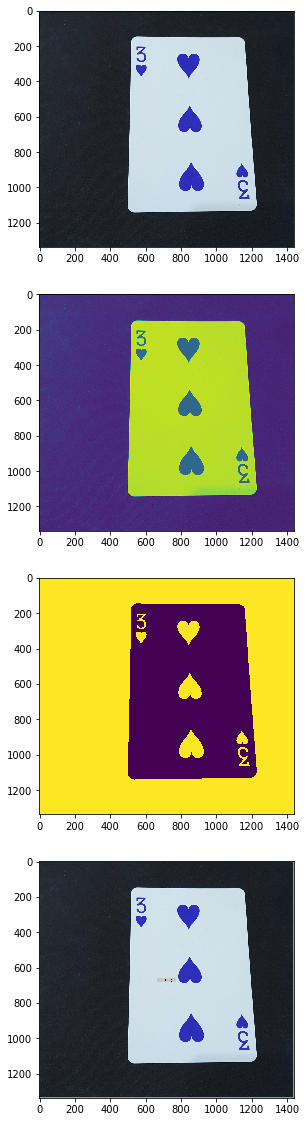

In [4]:
import cv2 as cv

def setLabel(image, str, contour):
    (text_width, text_height), baseline = cv.getTextSize(str, cv.FONT_HERSHEY_SIMPLEX, 0.7, 1)
    x,y,width,height = cv.boundingRect(contour)
    pt_x = x+int((width-text_width)/2)
    pt_y = y+int((height + text_height)/2)
    cv.rectangle(image, (pt_x, pt_y+baseline), (pt_x+text_width, pt_y-text_height), (200,200,200), cv.FILLED)
    cv.putText(image, str, (pt_x, pt_y), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 1, 8)

f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)
img_color = cv.imread('heart3.jpg', cv.IMREAD_COLOR)
# cv.imshow('result', img_color)
# ax1.subplot(4,1,1)
ax1.imshow(img_color)
# cv.waitKey(0)

img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
# plt.subplot(4,1,2)
ax2.imshow(img_gray)
# cv.imshow('result', img_gray)
# cv.waitKey(0)

ret,img_binary = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
# plt.subplot(4,1,3)
ax3.imshow(img_binary)
# cv.imshow('result', img_binary)
# cv.waitKey(0)

contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    size = len(cnt)
    print(size)

    epsilon = 0.005 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)

    size = len(approx)
    print(size)

    cv.line(img_color, tuple(approx[0][0]), tuple(approx[size-1][0]), (0, 255, 0), 3)
    for k in range(size-1):
        cv.line(img_color, tuple(approx[k][0]), tuple(approx[k+1][0]), (0, 255, 0), 3)

    if cv.isContourConvex(approx):
        if size == 3:
            setLabel(img_color, "triangle", cnt)
        elif size == 4:
            setLabel(img_color, "rectangle", cnt)
        elif size == 5:
            setLabel(img_color, "pentagon", cnt)
        elif size == 6:
            setLabel(img_color, "hexagon", cnt)
        elif size == 8:
            setLabel(img_color, "octagon", cnt)
        elif size == 10:
            setLabel(img_color, "decagon", cnt)
        else:
            setLabel(img_color, str(size), cnt)
    else:
        setLabel(img_color, str(size), cnt)

# cv.imshow('result', img_color)
# plt.subplot(4,1,4)
ax4.imshow(img_color)
# cv.waitKey(0)



In [1]:
import cv2 as cv

def setLabel(image, str, contour):
    (text_width, text_height), baseline = cv.getTextSize(str, cv.FONT_HERSHEY_SIMPLEX, 0.7, 1)
    x,y,width,height = cv.boundingRect(contour)
    pt_x = x+int((width-text_width)/2)
    pt_y = y+int((height + text_height)/2)
    cv.rectangle(image, (pt_x, pt_y+baseline), (pt_x+text_width, pt_y-text_height), (200,200,200), cv.FILLED)
    cv.putText(image, str, (pt_x, pt_y), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 1, 8)


img_color = cv.imread('heart3.jpg', cv.IMREAD_COLOR)
cv.imshow('result', img_color)
cv.waitKey(0)

img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imshow('result', img_gray)
cv.waitKey(0)

ret,img_binary = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
cv.imshow('result', img_binary)
cv.waitKey(0)

contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    size = len(cnt)
    print(size)

    epsilon = 0.005 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)

    size = len(approx)
    print(size)

    cv.line(img_color, tuple(approx[0][0]), tuple(approx[size-1][0]), (0, 255, 0), 3)
    for k in range(size-1):
        cv.line(img_color, tuple(approx[k][0]), tuple(approx[k+1][0]), (0, 255, 0), 3)

    if cv.isContourConvex(approx):
        if size == 3:
            setLabel(img_color, "triangle", cnt)
        elif size == 4:
            setLabel(img_color, "rectangle", cnt)
        elif size == 5:
            setLabel(img_color, "pentagon", cnt)
        elif size == 6:
            setLabel(img_color, "hexagon", cnt)
        elif size == 8:
            setLabel(img_color, "octagon", cnt)
        elif size == 10:
            setLabel(img_color, "decagon", cnt)
        else:
            setLabel(img_color, str(size), cnt)
    else:
        setLabel(img_color, str(size), cnt)

cv.imshow('result', img_color)
cv.waitKey(0)



4
4


49

In [52]:
img_gray.reshape(img_gray.shape[0]*img_gray.shape[1])

array([43, 41, 40, ..., 30, 30, 30], dtype=uint8)

In [57]:
img_gray.min()

6

In [7]:
cv2.Sobel(img,cv2.CV_64F,1,0,ksize=10)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\deriv.cpp:104: error: (-211:One of the arguments' values is out of range) The kernel size must be odd and not larger than 31 in function 'cv::getSobelKernels'


In [10]:
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'
